In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=88245917157580ec8777337e227c66e1e761940b2665f122f815c63455241a8a
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
################################################################################

from google.colab import drive
drive.mount('/content/drive')

################################################################################

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
################################################################################

import os
import librosa
import librosa.display
import struct
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import backend
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

################################################################################

Using TensorFlow backend.


Mounted at /content/drive


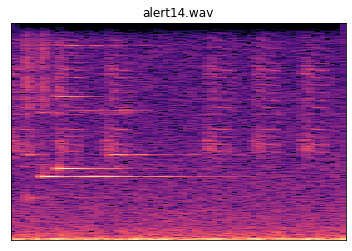

1 

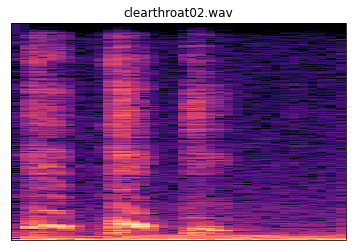

2 

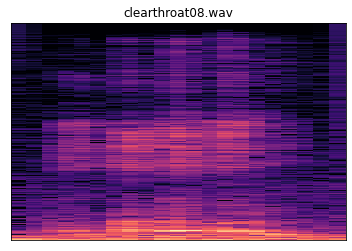

3 

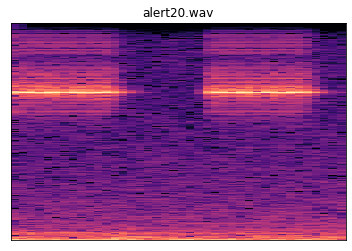

4 

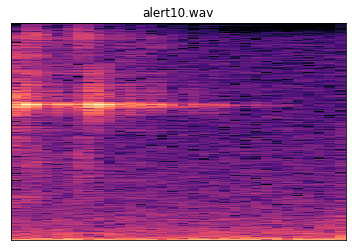

5 

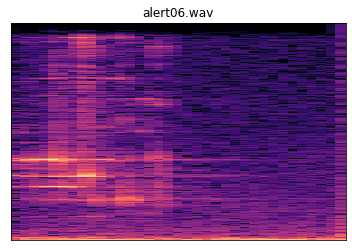

6 

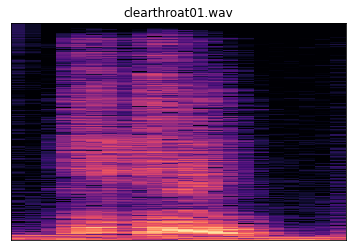

7 

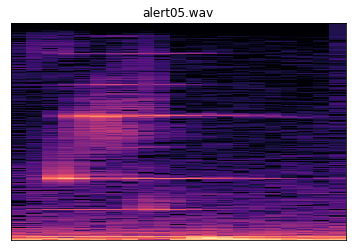

8 

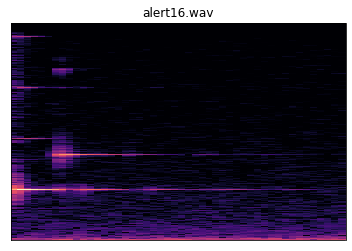

9 

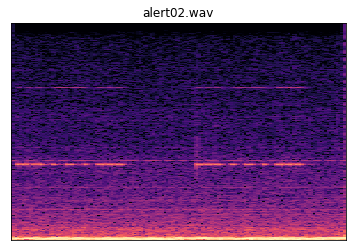

10 

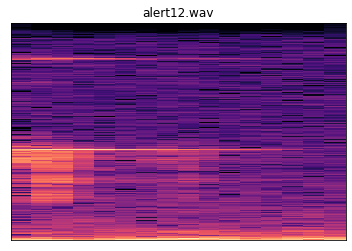

11 

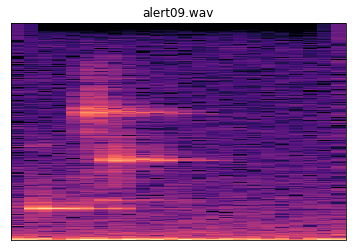

12 

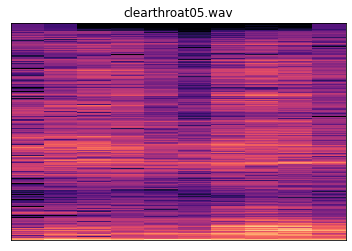

13 

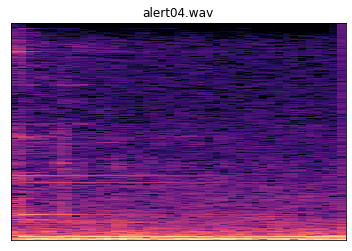

14 

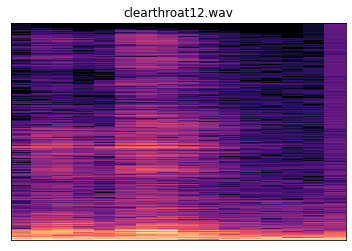

15 

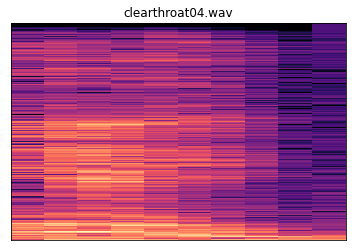

16 

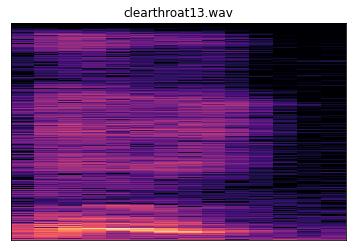

17 

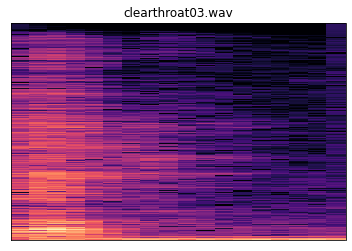

18 

KeyboardInterrupt: ignored

In [ ]:
################################################################################
# Creating Spectrograms of test images and then predicting results with the current model.

'''
n_fft = 2048
hop_length = 512
stft_all = np.array([])
path = '/content/drive/My Drive/Audio/train'
count = 0
for root, dir, files in os.walk(path):
  for file in files:

    # Loading the file by creating the directory
    file_path = root + '/' + file
    sample, sr = librosa.load(file_path, sr=10000)

    # Performing short term fourier transformation to the audio clip
    stft = librosa.core.spectrum.stft(sample, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    #Converting the spectrum to log specturm to clear out the spectogram images
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)


    plt.title(file)
    #plt.colorbar()
    filename, extension = os.path.splitext(file)
    #plt.savefig( '/content/drive/My Drive/Audio/train/log/' + filename + '.jpg')
    plt.show()
    count += 1
    print(count, end=" ")
'''
################################################################################

In [ ]:
################################################################################

## Running our model using ImageDataGenerator library on the test spectrogram images.
### Specifying the pixel images sizes, number of epochs, number of training and validation samples.

from keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 432, 288
nb_train_samples = 270
nb_validation_samples = 30
epochs = 50
batch_size = 32

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    validation_split=0.1)

train_data_dir = '/content/drive/My Drive/Audio/train/log'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes = ['alert', 'clearthroat', 'cough', 'drawer', 'doorslam', 'keys', 'keyboard', 'knock', 'laughter', 'mouse', 'pageturn', 'pendrop',
               'phone', 'printer', 'speech', 'switch'],
    class_mode= 'categorical',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes = ['alert', 'clearthroat', 'cough', 'drawer', 'doorslam', 'keys', 'keyboard', 'knock', 'laughter', 'mouse', 'pageturn', 'pendrop',
               'phone', 'printer', 'speech', 'switch'],
    class_mode='categorical',
    subset = 'validation')

################################################################################

Found 288 images belonging to 16 classes.
Found 32 images belonging to 16 classes.


In [ ]:
################################################################################
### Creating input shape for CNN, based on the condition if the image is grayscale or colored.

dir = '/content/drive/My Drive/Audio/train/Spectro'

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

################################################################################

In [ ]:
################################################################################
### Creating Sequential model to train our audio samples, using 2D Convulutional Network.

from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 16, activation = 'softmax'))
model.summary()

################################################################################

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 431, 287, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 431, 287, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 215, 143, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 214, 142, 32)      4128      
_________________________________________________________________
activation_2 (Activation)    (None, 214, 142, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 107, 71, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 70, 32)      

In [ ]:
################################################################################
### Creating checkpoint to save the best weight with best accuracy.

from keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

checkpoint = ModelCheckpoint('Best_modelweight.h5', monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs= epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples,
    callbacks = callbacks_list)

model.save_weights('model_saved.h5')

################################################################################

Epoch 1/50
8/8 [==============================] - 128s 16s/step - loss: 2.7953 - categorical_accuracy: 0.0742 - val_loss: 2.7714 - val_categorical_accuracy: 0.1875

Epoch 00001: val_categorical_accuracy improved from -inf to 0.18750, saving model to Best_modelweight.h5
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 2.7737 - categorical_accuracy: 0.0664 - val_loss: 2.7682 - val_categorical_accuracy: 0.1875

Epoch 00002: val_categorical_accuracy did not improve from 0.18750
Epoch 3/50
8/8 [==============================] - 7s 904ms/step - loss: 2.7653 - categorical_accuracy: 0.0898 - val_loss: 2.7569 - val_categorical_accuracy: 0.0625

Epoch 00003: val_categorical_accuracy did not improve from 0.18750
Epoch 4/50
8/8 [==============================] - 7s 905ms/step - loss: 2.7453 - categorical_accuracy: 0.1172 - val_loss: 2.7113 - val_categorical_accuracy: 0.1875

Epoch 00004: val_categorical_accuracy did not improve from 0.18750
Epoch 5/50
8/8 [====================

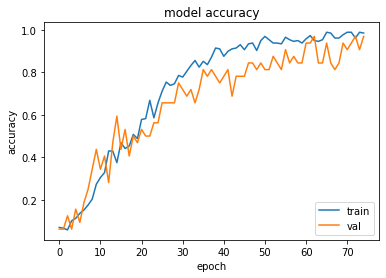

In [ ]:
################################################################################
## Plotting of Training Accuracy Vs Validation Accuracy on data points

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('/content/drive/My Drive/Audio/train_accuracyVScat_accuracy.jpg')
plt.show()

################################################################################

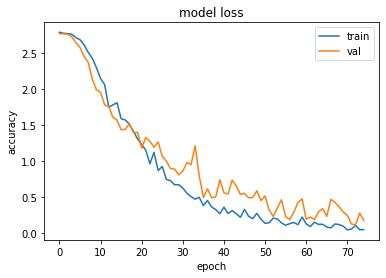

In [ ]:
################################################################################
## Plotting of Training Loss Vs Validation Loss on data points

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('/content/drive/My Drive/Audio/train_lossVScat_loss.jpg')
plt.show()

################################################################################

In [ ]:
################################################################################
'''
import numpy as np
n_fft = 2048
hop_length = 512
stft_all = np.array([])
path = '/content/drive/My Drive/Audio/test/'
count = 0
for root, dir, files in os.walk(path):
  for file in files:

    # Loading the file by creating the directory
    file_path = root + '/' + file
    sample, sr = librosa.load(file_path, sr=22000)

    # Performing short term fourier transformation to the audio clip
    stft = librosa.core.spectrum.stft(sample, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    #Converting the spectrum to log specturm to clear out the spectogram images
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)


    plt.title(file)
    #plt.colorbar()
    filename, extension = os.path.splitext(file)
    plt.savefig( '/content/drive/My Drive/Audio/test/logarithm/log_sam/' + filename + '.jpg')
    plt.show()
    count += 1
    print(count, end=" ")
'''
################################################################################

In [ ]:
################################################################################
### Steps to check accuracy of training data
val_steps = 32 // batch_size
train_steps = 288 // batch_size

loss, categorical_accuracy = model.evaluate_generator(validation_generator, steps=val_steps)

print('Accuracy on validation data: {:.2f}%'.format(categorical_accuracy * 100))
print(loss)

################################################################################

Accuracy on validation data: 81.25%
0.788867712020874


In [ ]:
################################################################################
### Creating test generator to predict test results
import numpy as np
import pandas as pd

test_dir = '/content/drive/My Drive/Audio/test/logarithm/'
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    classes = ['log_sam'],
    class_mode=None)

################################################################################

Found 366 images belonging to 1 classes.


In [ ]:
################################################################################
### Predicting test results using the above created test generator and exporting the results in a csv file

test_steps = test_generator.n // test_generator.batch_size

test_generator.reset()
predict = model.predict_generator(test_generator, steps=test_steps, verbose=1)

predicted_class_indices = np.argmax(predict, axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
#print(filenames)
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('/content/drive/My Drive/Audio/Results.csv')
print(results)

################################################################################

366/366 [==============================] - 2s 6ms/step
                      Filename  Predictions
0    log_sam/test_samp_100.jpg  clearthroat
1    log_sam/test_samp_101.jpg  clearthroat
2    log_sam/test_samp_102.jpg     keyboard
3    log_sam/test_samp_103.jpg       switch
4    log_sam/test_samp_104.jpg       switch
..                         ...          ...
361   log_sam/test_samp_95.jpg     keyboard
362   log_sam/test_samp_96.jpg       switch
363   log_sam/test_samp_97.jpg  clearthroat
364   log_sam/test_samp_98.jpg  clearthroat
365   log_sam/test_samp_99.jpg     laughter

[366 rows x 2 columns]
